In [1]:
import torch
import torch.optim as optim
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
import seaborn
import csv

import dataset
import datasplit
import model.models as models
import trainer
import utils

In [2]:
models_folder = '../../saved/models'
model_name = '20201028_fxnet_poly_best'
results_folder = '../../saved/results'
results_subfolder = '20201028_fxnet_poly'

In [3]:
# load model
fxnet = torch.load('%s/%s' % (models_folder, model_name), map_location=torch.device('cpu'))

In [4]:
all_train_losses = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_train_losses.npy')), allow_pickle=True)
all_train_correct = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_train_correct.npy')), allow_pickle=True)
best_train_results = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'best_train_results.npy')), allow_pickle=True)

all_val_losses = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_val_losses.npy')), allow_pickle=True)
all_val_correct = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_val_correct.npy')), allow_pickle=True)
best_val_results = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'best_val_results.npy')), allow_pickle=True)

all_test_losses = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_test_losses.npy')), allow_pickle=True)
all_test_correct = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_test_correct.npy')), allow_pickle=True)
best_test_results = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'best_test_results.npy')), allow_pickle=True)

fx_labels = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'fx_labels.npy')), allow_pickle=True)

In [5]:
train_set_size = best_train_results.shape[0]
val_set_size = best_val_results.shape[0]
test_set_size = best_test_results.shape[0]

In [23]:
test_set_size

16632

In [6]:
# BEST RESULTS
print('Accuracy: ', 100 * max(all_train_correct) / train_set_size)
print('Epoch: ', np.argmax(all_train_correct))
print()
print('Accuracy: ', 100 * max(all_val_correct) / val_set_size)
print('Epoch: ', np.argmax(all_val_correct))
print()
print('Accuracy: ', 100 * max(all_test_correct) / test_set_size)
print('Epoch: ', np.argmax(all_test_correct))
print()

Accuracy:  89.60668058455114
Epoch:  49

Accuracy:  88.93732150909364
Epoch:  36

Accuracy:  88.40788840788841
Epoch:  36



In [7]:
# # LOSS
# epochs = range(0, len(all_train_losses))
# plt.figure(figsize=(8,6))
# plt.grid(b=None, which='major', axis='both')
# plt.plot(epochs, all_train_losses, 'b', label='Train loss')
# plt.plot(epochs, all_val_losses, 'r', label='Validation loss')
# plt.plot(epochs, all_test_losses, 'g', label='Test loss')
# plt.title('Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [8]:
# # NORMALISED LOSS
# epochs = range(0, len(all_train_losses))
# plt.figure(figsize=(8,6))
# plt.grid(b=None, which='major', axis='both')
# plt.plot(epochs, np.array(all_train_losses) / max(all_train_losses), 'b', label='Train loss')
# plt.plot(epochs, np.array(all_val_losses) / max(all_val_losses), 'r', label='Validation loss')
# plt.plot(epochs, np.array(all_test_losses) / max(all_test_losses), 'g', label='Test loss')
# plt.title('Normalised Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [9]:
# # ACCURACY
# all_train_perc_correct = 100 * np.array(all_train_correct) / train_set_size
# all_val_perc_correct = 100 * np.array(all_val_correct) / val_set_size
# all_test_perc_correct = 100 * np.array(all_test_correct) / test_set_size
# epochs = range(0, len(all_train_losses))
# plt.figure(figsize=(8,6))
# plt.grid(b=None, which='major', axis='both')
# plt.plot(epochs, all_train_perc_correct, 'b', label='Train loss')
# plt.plot(epochs, all_val_perc_correct, 'r', label='Validation loss')
# plt.plot(epochs, all_test_perc_correct, 'g', label='Test loss')
# plt.title('Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [10]:
best_train_results[0]

array(['51523', 'P95-45210-RAT-D2F2-41502', '8', '8'], dtype='<U26')

In [11]:
# CONFUSION MATRICES

# Find best performance epoch based on validation
# Extract results from training and test for that epoch
best_val = 100 * max(all_val_correct) / val_set_size
best_val_idx = np.argmax(all_val_correct)

print("Best Validation Accuracy: ",best_val, "at epoch ", best_val_idx)
print("Training Accuracy: ", 100 * all_train_correct[best_val_idx] / train_set_size)
print("Test Accuracy: ", 100 * all_test_correct[best_val_idx] / test_set_size)

# Confusion matrices for best validation epoch
# extract predictions and targets vectors
train_preds = best_train_results[:, 2]
train_targets = best_train_results[:, 3]
val_preds = best_val_results[:, 2]
val_targets = best_val_results[:, 3]
test_preds = best_test_results[:, 2]
test_targets = best_test_results[:, 3]

# calculate conf. matrix
train_cm = confusion_matrix(y_true=train_targets, y_pred=train_preds, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12'])
val_cm = confusion_matrix(y_true=val_targets, y_pred=val_preds, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12'])
test_cm = confusion_matrix(y_true=test_targets, y_pred=test_preds, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12'])

Best Validation Accuracy:  88.93732150909364 at epoch  36
Training Accuracy:  89.18580375782881
Test Accuracy:  88.40788840788841


In [12]:
# # Train CM
# plt.figure(figsize=(10,10))
# utils.plot_confusion_matrix(train_cm, fx_labels, normalize=True, title='FxNet - train confusion matrix')
# plt.title('FxNet - train = poly', fontsize=20)
# plt.xlabel('True label', fontsize=16)
# plt.ylabel('Predicted label', fontsize=16)
# plt.rc('xtick', labelsize=16)
# plt.rc('ytick', labelsize=16)
# plt.rc('font', size=16) 
# # plt.savefig('%s/%s/%s' % (results_folder, results_subfolder, 'fxnet_train_cm_norm.svg'))

In [13]:
# plt.figure(figsize=(10,10))
# utils.plot_confusion_matrix(val_cm, fx_labels, normalize=True, title='FxNet - validation confusion matrix')
# plt.title('FxNet - val = poly', fontsize=20)
# plt.xlabel('True label', fontsize=16)
# plt.ylabel('Predicted label', fontsize=16)
# plt.rc('xtick', labelsize=16)
# plt.rc('ytick', labelsize=16)
# plt.rc('font', size=16) 
# # plt.savefig('%s/%s/%s' % (results_folder, results_subfolder, 'fxnet_val_cm_norm.svg'))

Normalized confusion matrix


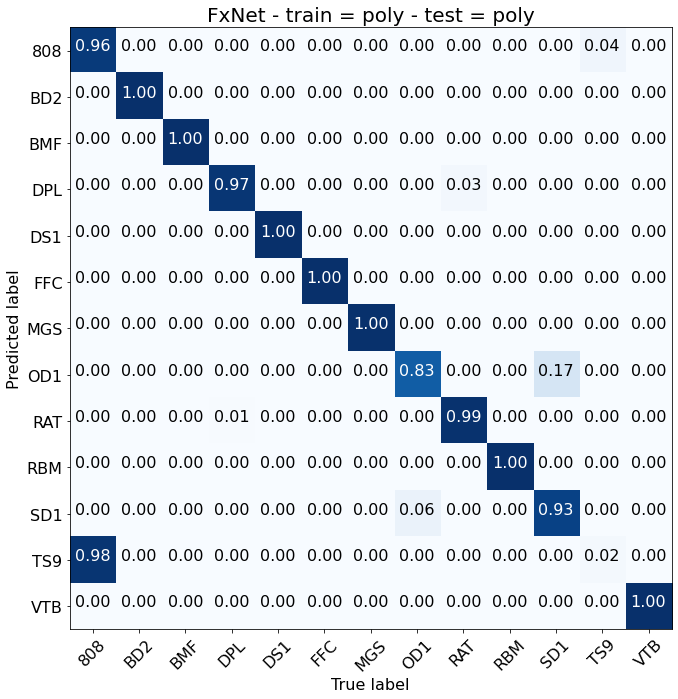

In [24]:
# Test CM
plt.figure(figsize=(10,10))
utils.plot_confusion_matrix(test_cm, fx_labels, normalize=True, title='FxNet - train = poly - test = poly')
plt.title('FxNet - train = poly - test = poly', fontsize=20)
plt.xlabel('True label', fontsize=16)
plt.ylabel('Predicted label', fontsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('font', size=16) 
plt.tight_layout()
# plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'fxnet_poly_poly_cm.eps'), format='eps')

### TEST on MONO

In [17]:
dataset_mono = dataset.FxDataset(
                            root='/Volumes/Macintosh HD/DATASETS/GUITAR-FX/Mono',
                            excl_folders=['NoFX_mono', 'NoFX_mono_preprocessed', 'MT2'], 
                            spectra_folder='mel_22050_1024_512', 
                            processed_settings_csv='proc_settings.csv',
                            max_num_settings=3,
                            transform=transforms.Compose([transforms.ToTensor()])
                            )
dataset_mono.init_dataset()
# dataset.generate_mel()

# split
# set test_train_split=0.0 and val_train_split=0.0 to test pre-trained model
split_mono = datasplit.DataSplit(dataset_mono, test_train_split=0.0, val_train_split=0.0, shuffle=True)

# loaders
_, _, test_loader_mono = split_mono.get_split(batch_size=100)

In [18]:
len(dataset_mono)

123552

In [19]:
test_mono_loss, test_mono_correct, test_mono_results = trainer.test_fx_net(
        model=fxnet, 
        test_loader=test_loader_mono, 
        test_sampler=split_mono.test_sampler,
        loss_function=nn.CrossEntropyLoss(), 
        device='cpu'
    )

====> Test Loss: 29293.1165	 Avg Loss: 0.2371	Correct: 17997/123552	Percentage Correct: 14.57


In [18]:
# test_mono_results_npy = np.array(test_mono_results)

# test_mono_preds = test_mono_results_npy[:, 2]
# test_mono_targets = test_mono_results_npy[:, 3]

# # calculate conf. matrix
# test_mono_cm = confusion_matrix(test_mono_targets, test_mono_preds)

In [18]:
# # Test CM
# plt.figure(figsize=(10,10))
# utils.plot_confusion_matrix(test_mono_cm, fx_labels, normalize=True, title='FxNet - train = poly - test = mono')
# # plt.savefig('%s/%s/%s' % (results_folder, results_subfolder, 'fxnet_mono_test_poly_cm.svg'))

### TEST on POLY RANDOM BIG

In [16]:
# dataset
dataset_poly_rnd_bg = dataset.FxDataset(
                            root='/Volumes/Macintosh HD/DATASETS/GUITAR-FX/Poly_Random_Bg',
                            excl_folders=['MT2'], 
                            spectra_folder='mel_22050_1024_512', 
                            processed_settings_csv='proc_settings.csv',
                            max_num_settings=3,
                            transform=transforms.Compose([transforms.ToTensor()])
                            )

dataset_poly_rnd_bg.init_dataset()
# dataset_mono_rnd.generate_mel()

# split
# set test_train_split=0.0 and val_train_split=0.0 to test pre-trained model
split_poly_rnd_bg = datasplit.DataSplit(dataset_poly_rnd_bg, test_train_split=0.0, val_train_split=0.0, shuffle=True)

# loaders
_, _, test_loader_poly_rnd_bg = split_poly_rnd_bg.get_split(batch_size=100)

In [17]:
len(dataset_poly_rnd_bg)
dataset_poly_rnd_bg.fx_to_label

{'808': 0,
 'BD2': 1,
 'BMF': 2,
 'DPL': 3,
 'DS1': 4,
 'FFC': 5,
 'MGS': 6,
 'OD1': 7,
 'RAT': 8,
 'RBM': 9,
 'SD1': 10,
 'TS9': 11,
 'VTB': 12}

In [18]:
test_poly_rnd_bg_loss, test_poly_rnd_bg_correct, test_poly_rnd_bg_results = trainer.test_fx_net(
        model=fxnet, 
        test_loader=test_loader_poly_rnd_bg, 
        test_sampler=split_poly_rnd_bg.test_sampler,
        loss_function=nn.CrossEntropyLoss(), 
        device='cpu'
    )

====> Test Loss: 273.0118	 Avg Loss: 0.0021	Correct: 116198/130000	Percentage Correct: 89.38


In [19]:
test_poly_rnd_bg_results_npy = np.array(test_poly_rnd_bg_results)

test_poly_rnd_bg_preds = test_poly_rnd_bg_results_npy[:, 2]
test_poly_rnd_bg_targets = test_poly_rnd_bg_results_npy[:, 3]

# calculate conf. matrix
test_poly_rnd_bg_cm = confusion_matrix(test_poly_rnd_bg_targets, test_poly_rnd_bg_preds, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12'])

Normalized confusion matrix


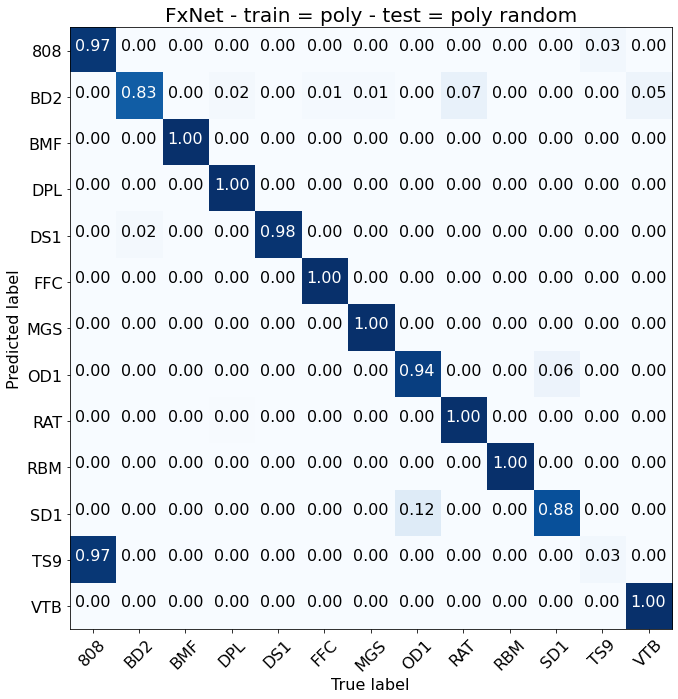

In [25]:
# Test CM
plt.figure(figsize=(10,10))
utils.plot_confusion_matrix(test_poly_rnd_bg_cm, fx_labels, normalize=True, title='FxNet - train = poly - test = poly rnd bg')
plt.title('FxNet - train = poly - test = poly random', fontsize=20)
plt.xlabel('True label', fontsize=16)
plt.ylabel('Predicted label', fontsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('font', size=16) 
plt.tight_layout()
# plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'fxnet_poly_polyrnd_cm.eps'), format='eps')

### TEST on MONO RANDOM BIG

In [23]:
# dataset
dataset_mono_rnd_bg = dataset.FxDataset(
                            root='/Volumes/Macintosh HD/DATASETS/GUITAR-FX/Mono_Random_Bg',
                            excl_folders=['MT2'], 
                            spectra_folder='mel_22050_1024_512', 
                            processed_settings_csv='proc_settings.csv',
                            max_num_settings=3,
                            transform=transforms.Compose([transforms.ToTensor()])
                            )

dataset_mono_rnd_bg.init_dataset()
# dataset_mono_rnd.generate_mel()

# split
# set test_train_split=0.0 and val_train_split=0.0 to test pre-trained model
split_mono_rnd_bg = datasplit.DataSplit(dataset_mono_rnd_bg, test_train_split=0.0, val_train_split=0.0, shuffle=True)

# loaders
_, _, test_loader_mono_rnd_bg = split_mono_rnd_bg.get_split(batch_size=100)

In [24]:
len(dataset_mono_rnd_bg)

130000

In [25]:
test_mono_rnd_bg_loss, test_mono_rnd_bg_correct, test_mono_rnd_bg_results = trainer.test_fx_net(
        model=fxnet, 
        test_loader=test_loader_mono_rnd_bg, 
        test_sampler=split_mono_rnd_bg.test_sampler,
        loss_function=nn.CrossEntropyLoss(), 
        device='cpu'
    )

====> Test Loss: 39597.2923	 Avg Loss: 0.3046	Correct: 11731/130000	Percentage Correct: 9.02
